## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D


## 2. Load Dataset

In [2]:
df = pd.read_csv("imovel.csv")
df.head()


,Preço,Tamanho_m2,Num_Banheiros,Renda_Comprador,Dist_Centro,Renda_Variável,Num_Quartos,Idade_Imovel,Num_Filhos,Temp_Anterior,Anuncios_Imoveis
0,482467.165133,402.724558,1.583767,3074.613301,13.305021,13795.341158,12.668333,742.422003,1,22.400213,97.587766
1,905451.573448,335.675168,7.343776,5828.968076,16.104206,15314.324595,11.561203,3476.733918,2,22.853164,19.390257
2,622925.025085,162.069391,5.332362,3141.767675,11.640054,3441.899287,5.151870,4150.478857,0,22.097655,49.228611
3,486934.545202,391.134139,7.012715,1660.752312,10.820213,17314.123056,13.382428,2946.799234,0,22.004017,11.166280
4,628023.489312,190.884621,3.852009,2828.530685,16.268718,10920.826388,6.830903,4988.796869,2,22.663463,75.732298


## 3. Exploratory Data Analysis

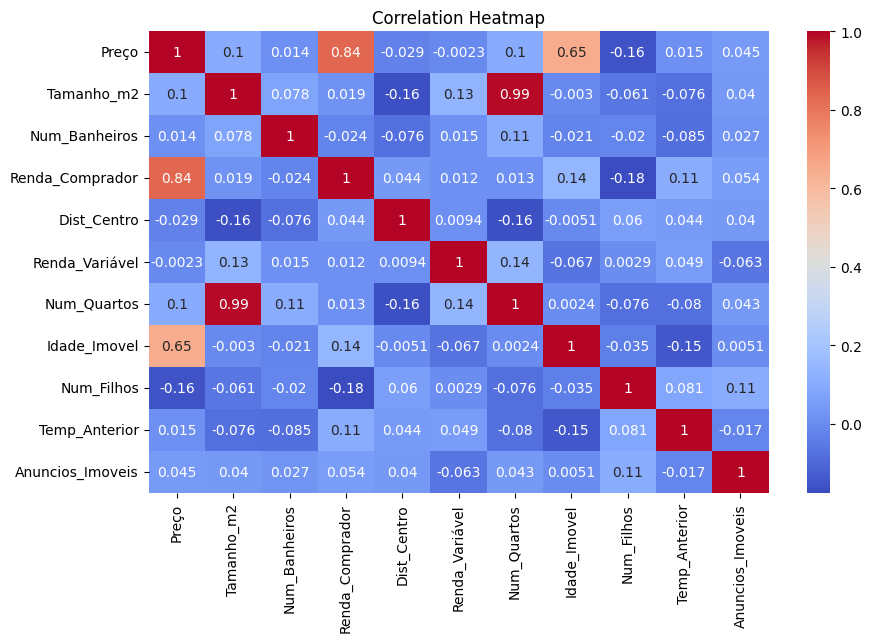

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 4. OLS Summary

In [4]:
x = df.drop(columns=["Preço"])
y = df["Preço"]

x_const = sm.add_constant(x)
full_model = sm.OLS(y, x_const).fit()
print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.564e+08
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:34:29   Log-Likelihood:                -914.02
No. Observations:                 150   AIC:                             1850.
Df Residuals:                     139   BIC:                             1883.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.989e+04     58.889  

## 5. Select Significant Variables

In [5]:
significant_vars = full_model.pvalues[full_model.pvalues <= 0.05].index.tolist()
significant_vars = [v for v in significant_vars if v != "const"]

print(significant_vars)


['Tamanho_m2', 'Num_Banheiros', 'Renda_Comprador', 'Dist_Centro', 'Renda_Variável', 'Num_Quartos', 'Idade_Imovel', 'Num_Filhos', 'Temp_Anterior', 'Anuncios_Imoveis']


## 6. Individual Regressions

In [6]:
df_sig = df[significant_vars + ["Preço"]]

results = []
for col in significant_vars:
    x = sm.add_constant(df_sig[col])
    model = sm.OLS(df_sig["Preço"], x).fit()
    results.append({
        "Variable": col,
        "P-value": model.pvalues[col],
        "R² (individual)": model.rsquared
    })

summary_table = pd.DataFrame(results).sort_values(by="R² (individual)", ascending=False)
print(summary_table)


           Variable       P-value  R² (individual)
2   Renda_Comprador  1.951784e-40         0.699150
6      Idade_Imovel  2.048111e-19         0.423261
7        Num_Filhos  5.545588e-02         0.024563
0        Tamanho_m2  2.096093e-01         0.010615
5       Num_Quartos  2.136947e-01         0.010428
9  Anuncios_Imoveis  5.833066e-01         0.002038
3       Dist_Centro  7.243047e-01         0.000843
8     Temp_Anterior  8.595571e-01         0.000212
1     Num_Banheiros  8.602982e-01         0.000210
4    Renda_Variável  9.776998e-01         0.000005


## 7. Simple Linear Regression (2D)

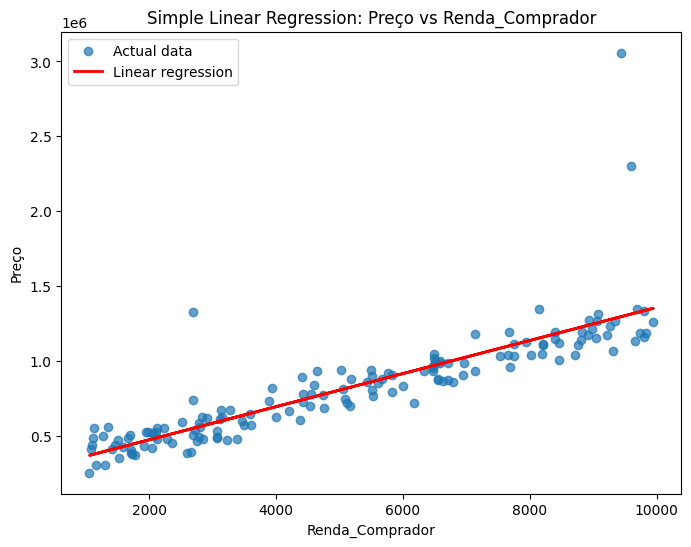

Intercept: 252691.468907275
Coefficient: 110.41337204986316
R²: 0.6991502113199926


In [7]:
best_var = summary_table.iloc[0, 0]
x = df_sig[[best_var]]
y = df_sig["Preço"]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Actual data")
plt.plot(x, lin_reg.predict(x), color="red", linewidth=2, label="Linear regression")
plt.xlabel(best_var)
plt.ylabel("Preço")
plt.title(f"Simple Linear Regression: Preço vs {best_var}")
plt.legend()
plt.show()

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_[0]}")
print(f"R²: {lin_reg.score(x, y)}")


## 8. Train/Test Split & Model Evaluation

In [8]:
best_vars = [summary_table.iloc[0, 0], summary_table.iloc[1, 0]]
x = df_sig[best_vars]
y = df_sig["Preço"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

lin_reg.fit(x_train, y_train)

print("Train R²:", lin_reg.score(x_train, y_train))
print("Test R²:", lin_reg.score(x_test, y_test))


Train R²: 0.9843871590093702
Test R²: 0.9906073033763841


## Extra: Multiple Linear Regression (3D)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


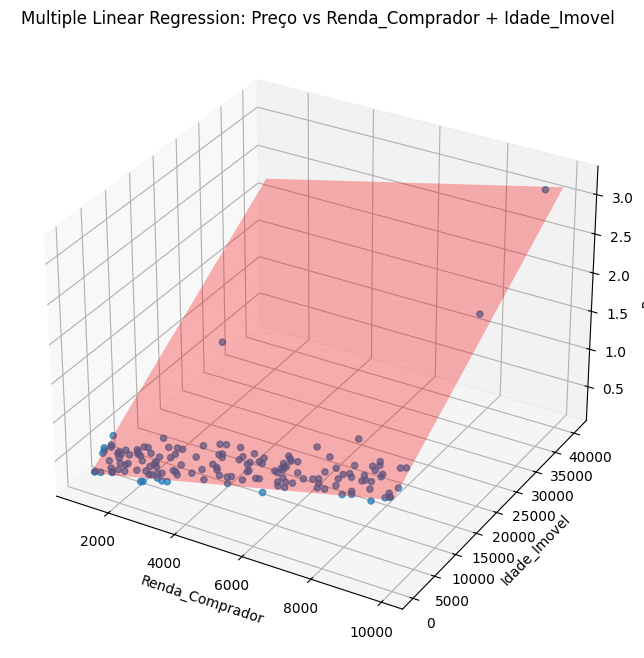

Intercept: 148329.43250827387
Coefficients: [100.22821003  49.49081085]
R²: 0.9877369633480001


In [9]:
best_var1 = summary_table.iloc[0, 0]
best_var2 = summary_table.iloc[1, 0]
x = df_sig[[best_var1, best_var2]]
y = df_sig["Preço"]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[best_var1], x[best_var2], y, alpha=0.7)

x_surf, y_surf = np.meshgrid(
    np.linspace(x[best_var1].min(), x[best_var1].max(), 50),
    np.linspace(x[best_var2].min(), x[best_var2].max(), 50)
)
z_pred = lin_reg.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_pred, color="red", alpha=0.3)

ax.set_xlabel(best_var1)
ax.set_ylabel(best_var2)
ax.set_zlabel("Preço")
plt.title(f"Multiple Linear Regression: Preço vs {best_var1} + {best_var2}")
plt.show()

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")
print(f"R²: {lin_reg.score(x, y)}")
